In [1]:
## Bowling Analysis
#Bowler performance based on economy rate and wickets.


In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="cricket_ml"
)


In [2]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(CASE WHEN bd.is_wicket = 1 THEN 1 END) AS wickets,
    SUM(bd.runs_total) AS runs_conceded,
    COUNT(*) AS balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 24
"""
df = pd.read_sql(query, conn)


C:\Users\hp\AppData\Local\Temp\ipykernel_28276\3586635392.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


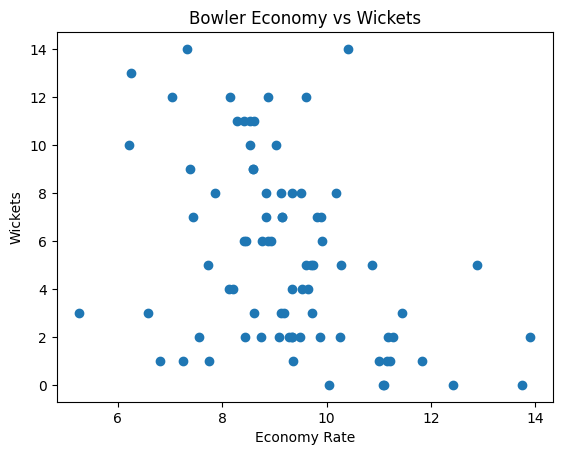

In [3]:
df["overs"] = df["balls"] / 6
df["economy"] = df["runs_conceded"] / df["overs"]

plt.figure()
plt.scatter(df["economy"], df["wickets"])
plt.xlabel("Economy Rate")
plt.ylabel("Wickets")
plt.title("Bowler Economy vs Wickets")
plt.show()


(130, 6)


C:\Users\hp\AppData\Local\Temp\ipykernel_28276\69864942.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Text(0.5, 1.0, 'Dot Ball %')

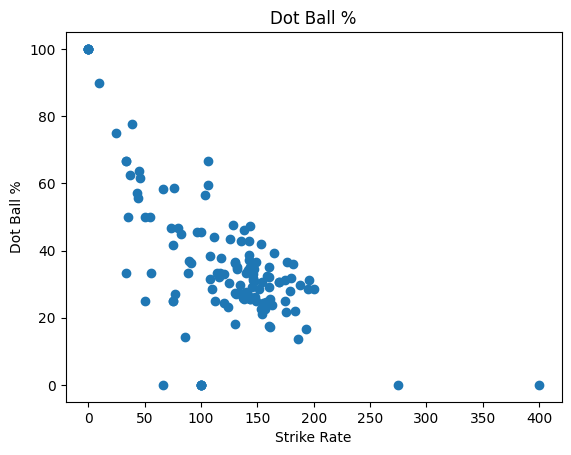

In [4]:
query = """
SELECT
    p.player_name,
    COUNT(*) AS balls,
    SUM(bd.runs_batter) AS runs,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.batter_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 1
"""
df = pd.read_sql(query, conn)

df["strike_rate"] = (df["runs"] / df["balls"]) * 100
df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100
print(df.shape)
df.head()

plt.figure()
plt.scatter(df["strike_rate"], df["dot_ball_pct"])
plt.xlabel("Strike Rate")
plt.ylabel("Dot Ball %")
plt.title("Dot Ball %")


In [5]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS balls,
    SUM(CASE WHEN bd.runs_total = 0 THEN 1 ELSE 0 END) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
GROUP BY p.player_name
HAVING balls >= 24
"""
df = pd.read_sql(query, conn)

df["dot_ball_pct"] = (df["dot_balls"] / df["balls"]) * 100
df = df.sort_values("dot_ball_pct", ascending=False).head(10)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28276\4228221649.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,balls,dot_balls,dot_ball_pct
79,XC Bartlett,36,17.0,47.222222
0,JR Hazlewood,151,70.0,46.357616
22,KK Ahmed,167,75.0,44.910180
9,Harshit Rana,144,62.0,43.055556
74,A Kamboj,31,13.0,41.935484
49,M Prasidh Krishna,167,70.0,41.916168
8,CV Varun,165,68.0,41.212121
45,Mohammed Siraj,182,73.0,40.109890
61,B Kumar,136,54.0,39.705882
38,Kuldeep Yadav,169,67.0,39.644970


In [6]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS sixes_conceded
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.is_six = 1
GROUP BY p.player_name
ORDER BY sixes_conceded DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28276\2817766506.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,sixes_conceded
0,Rashid Khan,17
1,KK Ahmed,16
2,Mohammed Shami,15
3,Ravi Bishnoi,14
4,V Nigam,14
5,PJ Cummins,14
6,SN Thakur,13
7,Simarjeet Singh,13
8,Mukesh Kumar,12
9,JR Hazlewood,12


In [7]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS fours_conceded
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.is_four = 1
GROUP BY p.player_name
ORDER BY fours_conceded DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28276\602396491.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,fours_conceded
0,MA Starc,35
1,Arshdeep Singh,29
2,JC Archer,27
3,Ravi Bishnoi,27
4,SN Thakur,27
5,Mohammed Siraj,26
6,M Theekshana,25
7,Mohammed Shami,25
8,PJ Cummins,23
9,DL Chahar,23


In [8]:
query = """
SELECT
    p.player_name AS bowler,
    COUNT(*) AS dot_balls
FROM ball_delivery bd
JOIN player p ON bd.bowler_id = p.player_id
WHERE bd.runs_total = 0
  AND bd.is_wide = 0
  AND bd.is_no_ball = 0
GROUP BY p.player_name
ORDER BY dot_balls DESC
LIMIT 10
"""
df = pd.read_sql(query, conn)
df


C:\Users\hp\AppData\Local\Temp\ipykernel_28276\3250593077.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,bowler,dot_balls
0,KK Ahmed,75
1,Mohammed Siraj,73
2,JR Hazlewood,70
3,M Prasidh Krishna,70
4,CV Varun,68
5,Kuldeep Yadav,67
6,JC Archer,62
7,Arshdeep Singh,62
8,Harshit Rana,62
9,MA Starc,56
